Questo notebook contiene lo svolgimento della prova di esame; tutte le funzioni necessarie sono state riportate all'interno del notebook (non è necessario l'uso di altri file per eseguire questo)

In [2]:
#functions to implement the hit-or-miss method
import numpy as np
import math
import random

def uniform_range(minimum: float,
                  maximum: float) -> float:
    """
    Generation of a pseudo-casual number distributed accordingly to uniform distribution between
    [minimum, maximum)

    Args:
        minimum: lower limit of the range (included)
        maximum: upper limit of the range (excluded)

    Returns:
        A pseudo-casual numbers generated according to uniform distribution between [minimum, maximum)
    """

    return minimum + (random.random() * (maximum - minimum))

def list_uniform_range(minimum: float,
                       maximum: float,
                       n: int,
                       seed: float = 0.) -> list[float]:
    """
        Generation of a list of n pseudo-casual number distributed accordingly
        to uniform distribution between [minimum, maximum) starting from an optional seed
        different from 0.

        Args:
            minimum: lower limit of the range (included)
            maximum: upper limit of the range (excluded)
            n: number of pseudo-casual numbers to generate
            seed: starting seed for the random generation (optional)

        Returns:
            A list of n pseudo-casual numbers generated according to uniform distribution between [minimum, maximum)
        """

    if seed != 0.:
        random.seed(seed)
    random_list = []
    for i in range(n):
        # Return the next random floating point number in the range 0.0 <= X < 1.0
        random_list.append(uniform_range(minimum, maximum))
    return random_list

def hom(function,
        xmin: float,
        xmax: float,
        ymax: float,
        n_evt: int = 100000) -> tuple[float, float]:
    """
    Calculation of a defined integral of a function using the hit-or-miss method

    Args:
        function: function whose integral has to be calculated [must be expressed in the form function(x)]
        xmin: lower limit of the integral
        xmax: upper limit of the integral
        ymax: maximum value of the function in the interval
        n_evt: number of points generated to calculate the integral (optional, default: 100000)

    Returns:
        The defined integral and the uncertainty of the value obtained
    """

    x_coord = list_uniform_range(xmin, xmax, n_evt)
    y_coord = list_uniform_range(0., ymax, n_evt)

    points_under = 0
    for x, y in zip(x_coord, y_coord):
        if function(x) > y:
            points_under = points_under + 1

    area_rect = (xmax - xmin) * ymax
    frac = float(points_under) / float(n_evt)
    integral = area_rect * frac
    integral_unc = area_rect ** 2 * frac * (1 - frac) / n_evt
    return integral, math.sqrt(integral_unc)

In [3]:
#because max of cos^2=1, max of A*cos^2=A
#first, calculation of the area of cos^2
area_1, sigma_area_1 = hom(lambda x: np.cos(x)*np.cos(x), 0, ((3/2)*math.pi), 1, 10000000)
print('Value of the area of the function with A=1:' + str(area_1) + ' +- ' + str(sigma_area_1))

Value of the area of the function with A=1:2.3556186362589417 +- 0.0007450940976819648


In [4]:
#the function is normalized if A=1/area(1*cos^2)
#definition of the normalized pdf
def pdf(x):
    if (0<x<((3/2)*math.pi)): 
        return (1/area_1)*np.cos(x)*np.cos(x)
    else: 
        return 0

In [5]:
#check of the normalization
area_norm, sigma_area_norm = hom(pdf, 0, ((3/2)*math.pi), 1, 10000000)
print('Value of the area of the pdf:' + str(area_norm) + ' +- ' + str(sigma_area_norm))

area_control = (abs(1-area_norm))/sigma_area_norm
print('True value at ' + str(area_control) + ' standard deviations')

Value of the area of the pdf:0.9994227757548045 +- 0.0006091652477378352
True value at 0.9475659475635104 standard deviations


In [6]:
#implementation of try-and-catch method

def tac_box(function,
            x_minimum: float,
            x_maximum: float,
            y_minimum: float,
            y_maximum: float,
            seed: float = 0.) -> float:
    """
    Generation of a pseudo-casual number distributed accordingly to a function
    with the try-an-catch algorithm, into a "box" delimited by x_minimum and x_maximum for the
    horizontal axis and y_minimum and y_maximum for the vertical axis starting from an optional seed
    different from 0.

    Args:
        function: the function which rules the distribution of numbers
        x_minimum: lower limit of the range for the horizontal axis
        x_maximum: upper limit of the range for the horizontal axis
        y_minimum: lower limit of the range for the vertical axis
        y_maximum: upper limit of the range for the vertical axis
        seed: starting seed for the random generation (optional)

    Returns:
        A single number generated with the try-an-catch algorithm distributed accordingly to the function wanted
    """

    if seed != 0.:
        random.seed(seed)
    x = uniform_range(x_minimum, x_maximum)
    y = uniform_range(y_minimum, y_maximum)
    while y > function(x):
        x = uniform_range(x_minimum, x_maximum)
        y = uniform_range(y_minimum, y_maximum)
    return x

In [7]:
#generation of 10000 pseudo-casual numbers
data = []
for i in range(10000):
    data.append(tac_box(pdf, 0, ((3/2)*math.pi), 0, (1/area_1)))

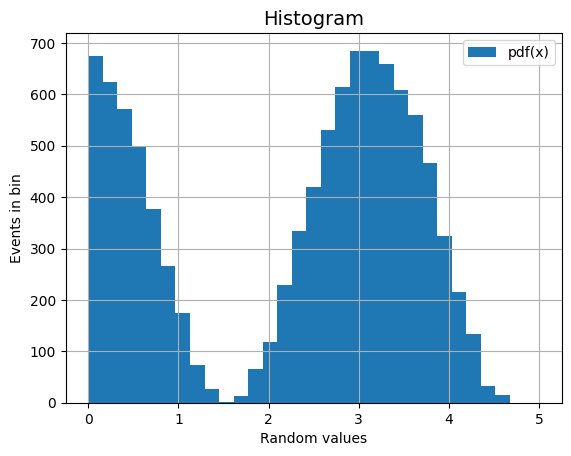

In [8]:
#data visualization

import matplotlib.pyplot as plt

def histogram(sample: list[float],
              title: str = 'Histogram',
              xlabel: str = 'Random values',
              ylabel: str = 'Events in bin',
              label: str = 'pdf(x)',
              sturges: bool = True):
    """
    Plots a histogram of samples, with optional title and x-label and y-label and legend. The function
    saves the histogram as a png image

    Args:
        sample: list of floats representing data
        title: title of the histogram
        xlabel: label of the x-axis
        ylabel: label of the y-axis
        label: title of the histogram in the legend
        sturges: if it is true, bins in the histogram are divided accordingly to the sturges rule

    Returns:
        The plot of the histogram of the sample
    """

    fig, ax = plt.subplots(nrows=1, ncols=1)
    if sturges is True:
        ax.hist(sample, label=label, bins=np.linspace(math.floor(min(sample)), math.ceil(max(sample)),
                                                      math.ceil(1 + 3.322 * np.log(len(sample)))))
    else:
        ax.hist(sample, label=label)
    ax.set_title(title, size=14)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)
    ax.legend()

    plt.show()
    return

histogram(data)

In [9]:
#implementation of the statistics functions

def mean(sample: list[float]) -> float:
    """
    Calculation of the mean of the sample passed as argument

    Args:
        sample: list of floats representing data

    Returns:
        The mean of the sample
    """

    summ = sum(sample)
    n = len(sample)
    return summ / n

def variance(sample: list[float],
             bessel: bool = True) -> float:
    """
    Calculation of the variance of the sample present in the object

    Args:
        sample: list of floats representing data
        bessel: applies the bessel correction (optional, default: True)

    Returns:
        The variance of the sample
    """

    summ = 0.
    sum_sq = 0.
    n = len(sample)
    for elem in sample:
        summ += elem
        sum_sq += elem * elem
    var = sum_sq / n - summ * summ / (n * n)
    if bessel:
        var = n * var / (n - 1)
    return var

def stddev(sample: list[float],
           bessel: bool = True) -> float:
    """
    Calculation of the standard deviation of the sample present in the object

    Args:
        sample: list of floats representing data
        bessel: applies the bessel correction (optional, default: True)

    Returns:
        The standard deviation of the sample
    """

    return math.sqrt(variance(sample, bessel))

def skewness(sample: list[float]) -> float:
    """
    Calculation of the skewness of the sample passed as argument

    Args:
        sample: list of floats representing data

    Returns:
        The skewness of the sample
    """

    mean_sample = mean(sample)
    skew = 0.
    for x in sample:
        skew = skew + math.pow(x - mean_sample,  3)
    skew = skew / (len(sample) * math.pow(stddev(sample), 3))
    return skew

def kurtosis(sample: list[float]) -> float:
    """
    Calculation of the kurtosis of the sample passed as argument

    Args:
        sample: list of floats representing data

    Returns:
        The kurtosis of the sample
    """

    mean_sample = mean(sample)
    kurt = 0.
    for x in sample:
        kurt = kurt + math.pow(x - mean_sample,  4)
    kurt = kurt / (len(sample) * math.pow(variance(sample), 2)) - 3
    return kurt

In [10]:
#calculation of mean, standard deviation, skewness and kurtosis of the data set

mean_data = mean(data)
stddev_data = stddev(data)
skew_data = skewness(data)
kurt_data = kurtosis(data)

print('Statistics of the data set: \n mean: ' + str(mean_data) + '\n standard deviation: ' + str(stddev_data) + '\n skewness: ' + str(skew_data) + '\n kurtosis: ' + str(kurt_data))

Statistics of the data set: 
 mean: 2.2623808239809304
 standard deviation: 1.353956579383592
 skewness: -0.4247584107524935
 kurtosis: -1.3327983543879425


In [11]:
#implementation of the functions for the central limit theorem method

def clt_minmax(minimum: float,
               maximum: float,
               n_sum: int = 10) -> float:
    """
    Generation of a pseudo-casual number with the central limit theorem algorithm
    between [minimum, maximum)

    Args:
        minimum: lower limit of the range (included)
        maximum: upper limit of the range (excluded)
        n_sum: number of repetitions used in the algorithm (optional, default: 10)

    Returns:
        A pseudo-casual numbers generated with the central limit theorem algorithm
        between [minimum, maximum)
    """

    y = 0.
    for i in range(n_sum):
        y += tac_box(pdf, minimum, maximum, 0, (1/area_1))
    y /= n_sum
    return y

def list_clt_minmax(minimum: float,
                    maximum: float,
                    n: int,
                    n_sum: int = 10,
                    seed: float = 0.) -> list[float]:
    """
    Generation of a list of n pseudo-casual numbers distributed between [minimum, maximum)
    with the central limit theorem algorithm starting from an optional seed
    different from 0.

    Args:
        minimum: lower limit of the range (included)
        maximum: upper limit of the range (excluded)
        n: length of the list
        n_sum: number of repetitions used in the algorithm (optional, default: 10)
        seed: starting seed for the random number generator (optional, default: 0.)

    Returns:
        A list of pseudo-casual numbers generated according to gaussian distribution specified

    """

    if seed != 0.:
        random.seed(seed)
    random_list = []
    for i in range(n):
        random_list.append(clt_minmax(minimum, maximum, n_sum))
    return random_list

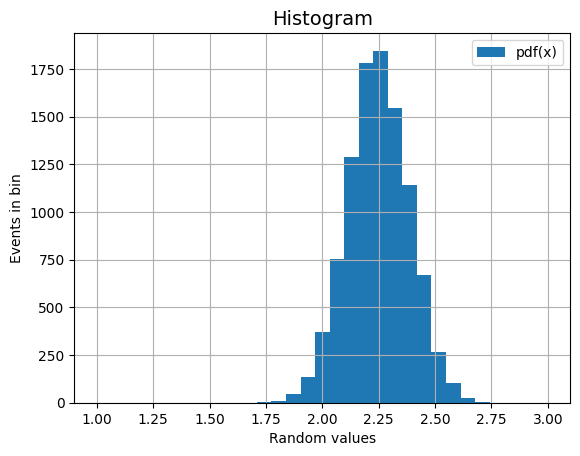

In [12]:
#generation of 10000 events with central limit theorem method

clt_data = list_clt_minmax(0, ((3/2)*math.pi), 10000, n_sum=100)
histogram(clt_data)

In [29]:
#check by fitting data to a gaussian using the binned likelihood in imiunit

from scipy.stats import norm, expon, normaltest
from iminuit import Minuit
from iminuit.cost import BinnedNLL
from math import floor, ceil, log
from IPython.display import display
from scipy.stats import chi2


def cdf(bin_edges, mu, sigma):
    return norm.cdf(bin_edges, mu, sigma)


bin_content, bin_edges = np.histogram(clt_data, bins=int(ceil(1 + 3.322 * log(len(clt_data)))), range=(floor(min(clt_data)), ceil(max(clt_data))))

#inizialization of the parameters using appropriate values
sample_mean = np.mean(clt_data)
sample_sigma = np.std(clt_data)

my_cost_func = BinnedNLL(bin_content, bin_edges, cdf)

N_events = sum(bin_content)

my_minuit = Minuit(my_cost_func, mu=sample_mean, sigma=sample_sigma)

my_minuit.migrad()
my_minuit.minos()
display(my_minuit)

display(my_minuit.covariance.correlation())

for key in my_minuit.parameters:
    print('parameter ' + key + ': ' +
          str(my_minuit.values[key]) + ' +- ' +
          str(my_minuit.errors[key]))

p_value_fit = 1. - chi2.cdf (my_minuit.fval, df = my_minuit.ndof)

print ('associated p-value: ' + str(p_value_fit))

if p_value_fit > 0.05:
    print('Test passed')

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 14.65 (χ²/ndof = 0.5)      │              Nfcn = 72               │
│ EDM = 5.65e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.2480   │  0.0014   │  -0.0014   │   0.0014   │         │         │       │
│ 1 │ sigma │ 136.8e-3  │  1.0e-3   │  -1.0e-3   │   1.0e-3   │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.0014  │  0.0014   │   -1e-3   │   1e-3    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │  1.9e-06        0 │
│ sigma │        0 9.69e-07 │
└───────┴───────────────────┘

,mu,sigma
mu,1,0
sigma,0,1


parameter mu: 2.2479750399726273 +- 0.0013801798843691407
parameter sigma: 0.13683369136624943 +- 0.0009842849606164594
associated p-value: 0.9915543351812799
Test passed


In [34]:
skew = []
kurt = []
all_data = []

for i in range(1000):
    toy = list_clt_minmax(0, ((3/2)*math.pi), 1000, n_sum=100)
    all_data.append(toy)
    skew.append(skewness(toy))
    kurt.append(kurtosis(toy))
skew_toy=mean(skew)
kurt_toy=mean(kurt)


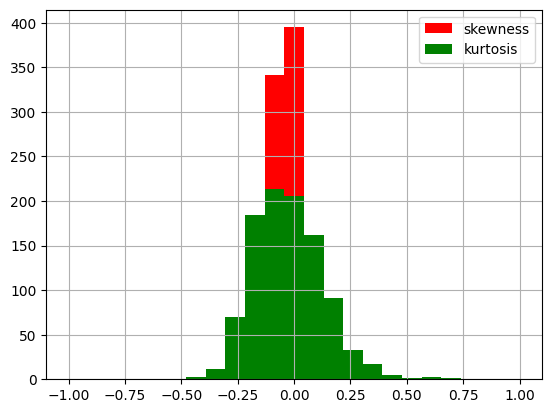

skewness: -0.04004290931885587
kurtosis: -0.026290188188777826


In [38]:
fig, ax = plt.subplots()
ax.hist(skew, bins=np.linspace(math.floor(min(skew)), math.ceil(max(skew)),
                                                      math.ceil(1 + 3.322 * np.log(len(skew)))), label='skewness', color='red')
ax.hist(kurt, bins=np.linspace(math.floor(min(kurt)), math.ceil(max(kurt)),
                                                      math.ceil(1 + 3.322 * np.log(len(kurt)))), label='kurtosis', color='green')
ax.legend()
ax.grid(True)
plt.show()

print('skewness: ' + str(skew_toy))
print('kurtosis: ' + str(kurt_toy))